In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [23]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# Calcular média, mediana, desvio padrão para as colunas
resumo_estatistico = iris_df.describe()

# Calcular moda separadamente, pois describe() não inclui
moda = iris_df.mode().iloc[0]

# Adicional a moda ao DataFrame de resumo estatístico
resumo_estatistico.loc["moda"] = moda

print("Mértodos de resumo estatisticos para o conjunto de dados ïris")
print(resumo_estatistico)

Mértodos de resumo estatisticos para o conjunto de dados ïris
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   
moda            5.000000          3.000000           1.400000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.8000

In [26]:
iris_hit_df = iris_df.drop(['target'], axis=1)
iris_hit_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


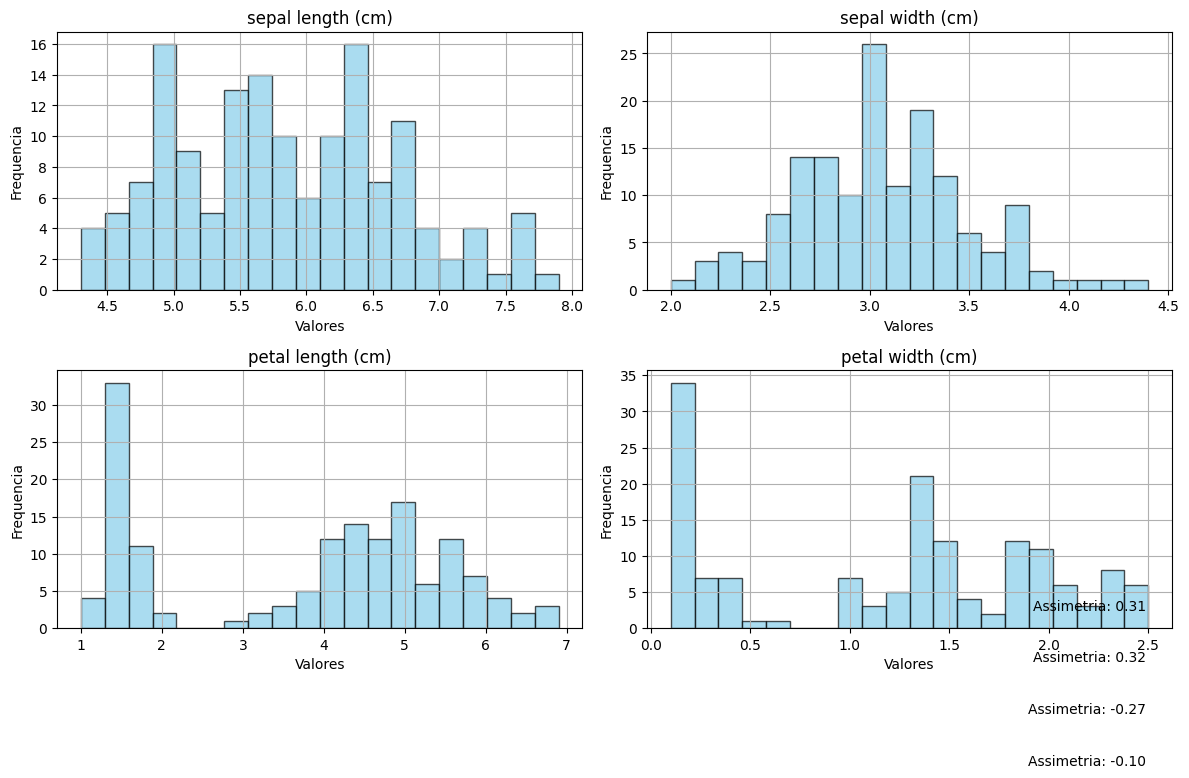

In [27]:
assimetria = iris_hit_df.skew()

plt.figure(figsize=(12, 8))

for i, col in enumerate(iris_hit_df.columns):
    plt.subplot(2,2, i + 1)
    plt.hist(iris_hit_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.grid(True)


for i, col in enumerate(iris_hit_df.columns):
    plt.text(0.95, .085 - i*0.2, 
             'Assimetria: {:.2f}'.format(assimetria[col]),
             horizontalalignment='right',
             verticalalignment='center',
             transform=plt.gca().transAxes
             )

plt.tight_layout()
plt.show()

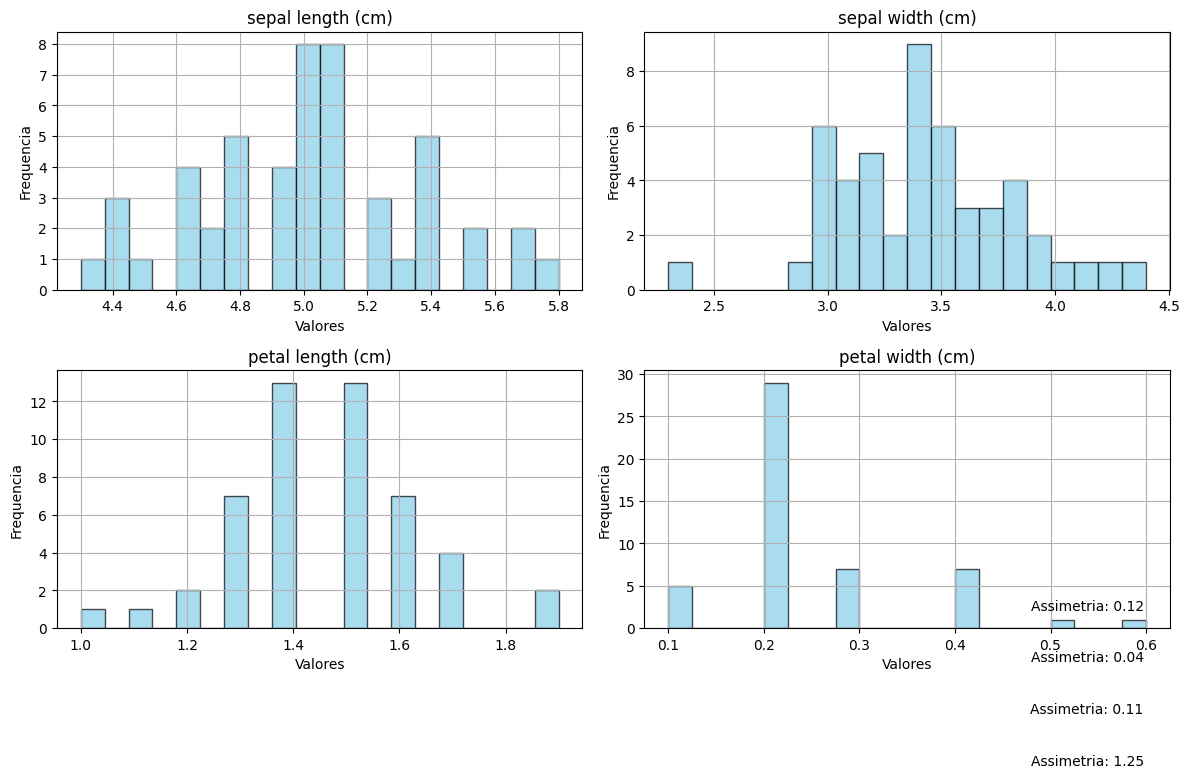

In [28]:
iris_hit_df = iris_df[iris_df["target"] == 0]
iris_hit_df = iris_hit_df.drop(['target'], axis=1)

assimetria = iris_hit_df.skew()

plt.figure(figsize=(12, 8))

for i, col in enumerate(iris_hit_df.columns):
    plt.subplot(2,2, i + 1)
    plt.hist(iris_hit_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.grid(True)


for i, col in enumerate(iris_hit_df.columns):
    plt.text(0.95, .085 - i*0.2, 
             'Assimetria: {:.2f}'.format(assimetria[col]),
             horizontalalignment='right',
             verticalalignment='center',
             transform=plt.gca().transAxes
             )

plt.tight_layout()
plt.show()

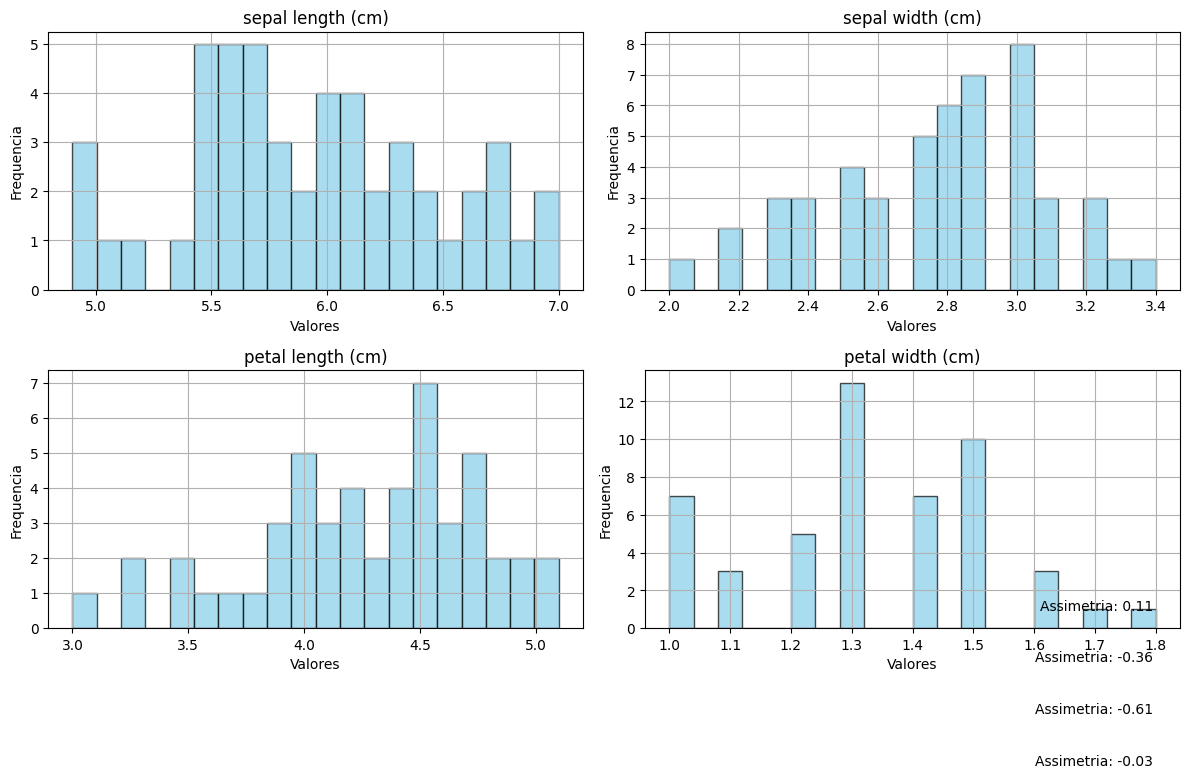

In [29]:
iris_hit_df = iris_df[iris_df["target"] == 1]
iris_hit_df = iris_hit_df.drop(['target'], axis=1)

assimetria = iris_hit_df.skew()

plt.figure(figsize=(12, 8))

for i, col in enumerate(iris_hit_df.columns):
    plt.subplot(2,2, i + 1)
    plt.hist(iris_hit_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.grid(True)


for i, col in enumerate(iris_hit_df.columns):
    plt.text(0.95, .085 - i*0.2, 
             'Assimetria: {:.2f}'.format(assimetria[col]),
             horizontalalignment='right',
             verticalalignment='center',
             transform=plt.gca().transAxes
             )

plt.tight_layout()
plt.show()

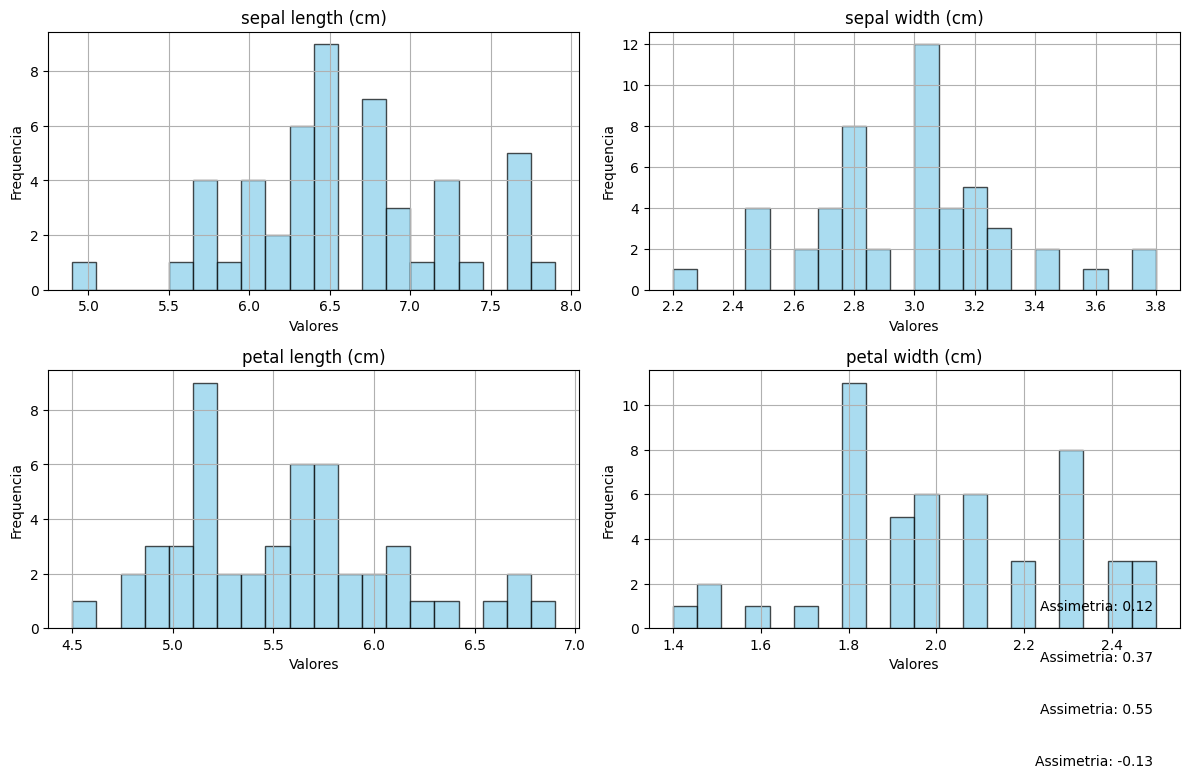

In [30]:
iris_hit_df = iris_df[iris_df["target"] == 2]
iris_hit_df = iris_hit_df.drop(['target'], axis=1)

assimetria = iris_hit_df.skew()

plt.figure(figsize=(12, 8))

for i, col in enumerate(iris_hit_df.columns):
    plt.subplot(2,2, i + 1)
    plt.hist(iris_hit_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.grid(True)


for i, col in enumerate(iris_hit_df.columns):
    plt.text(0.95, .085 - i*0.2, 
             'Assimetria: {:.2f}'.format(assimetria[col]),
             horizontalalignment='right',
             verticalalignment='center',
             transform=plt.gca().transAxes
             )

plt.tight_layout()
plt.show()